In [1]:
from domid.tasks.task_mnist import NodeTaskMNIST
import matplotlib.pyplot as plt
import torch.utils.data
%matplotlib inline

/alexej.gossmann_applications/cache/pypoetry/virtualenvs/domid-99PrLA_U-py3.10/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /alexej.gossmann_applications/cache/pypoetry/virtualenvs/domid-99PrLA_U-py3.10/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZNK3c1010TensorImpl36is_contiguous_nondefault_policy_implENS_12MemoryFormatE
  warn(f"Failed to load image Python extension: {e}")


In [2]:
from libdg.arg_parser import mk_parser_main
parser = mk_parser_main()
args = parser.parse_args(["--te_d", "9", "--dpath", "zout", "--split", "0.8"])
node = NodeTaskMNIST()
print(node.get_list_domains())
print(node.list_str_y)
print(node.init_business(args))

['digit0', 'digit1', 'digit2', 'digit3', 'digit4', 'digit5', 'digit6', 'digit7', 'digit8', 'digit9']
['dummy0', 'dummy1', 'dummy2', 'dummy3', 'dummy4', 'dummy5', 'dummy6', 'dummy7', 'dummy8', 'dummy9']


31.0%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

94.6%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



None


In [3]:
args

Namespace(lr=0.0001, es=10, seed=0, nocu=False, gen=False, keep_model=False, epos=2, epo_te=1, debug=False, dmem=False, out='zoutput', dpath='zout', tpath=None, apath=None, exptag='exptag', aggtag='aggtag', msel=None, aname='diva', acon=None, task=None, bs=100, split=0.8, te_d=['9'], tr_d=None, zd_dim=64, zx_dim=0, zy_dim=64, topic_dim=3, gamma_y=700000.0, gamma_d=100000.0, beta_t=1.0, beta_d=1.0, beta_x=1.0, beta_y=1000.0, warmup=100, tau=0.05, epochs_ctr=3, epochs_erm=3, penalty_ws=0.1, epos_per_match_update=5)

## check data subset of digit 2:

In [4]:
dset2 = node.get_dset_by_domain(args, 'digit2')

In [5]:
for d in dset2:
    print(type(d))

<class 'torch.utils.data.dataset.Subset'>
<class 'torch.utils.data.dataset.Subset'>


In [6]:
print("Training portion: {} images\nTest portion: {} images".format(len(dset2[0]), len(dset2[1])))

Training portion: 4766 images
Test portion: 1192 images


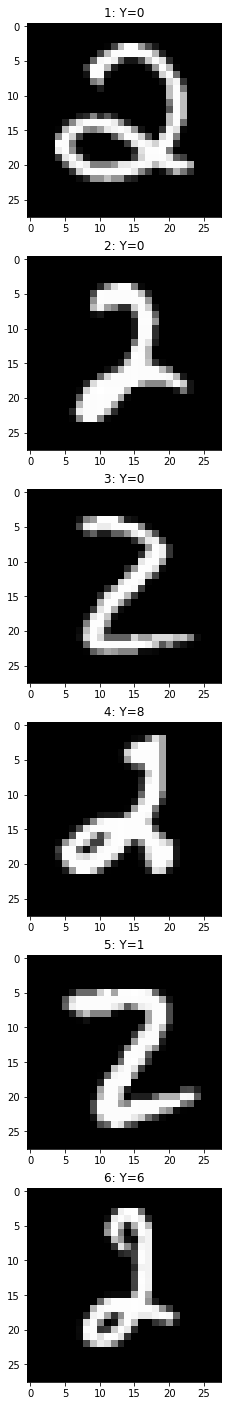

In [7]:
ldr = torch.utils.data.DataLoader(dset2[0])

plt.figure(figsize=(5,25))
for i, (tensor_x, vec_y) in enumerate(ldr):
    plt.subplot(6, 1, i+1)
    plt.title("{}: Y={}".format(i+1, vec_y[0].numpy().argmax()))
    plt.imshow(tensor_x[0].cpu().numpy().swapaxes(0, -1).swapaxes(0,1))
    if i >= 5:
        break

## Check the training data loader

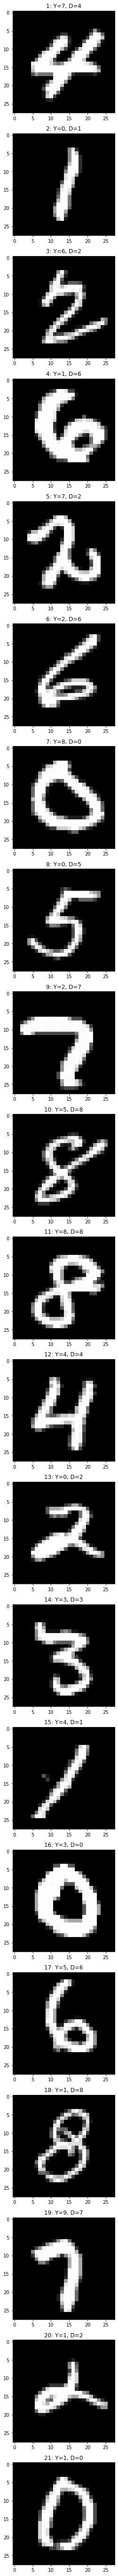

In [8]:
plt.figure(figsize=(5,100))
for i, (tensor_x, vec_y, vec_d) in enumerate(node.loader_tr):
    plt.subplot(21, 1, i+1)
    plt.title("{}: Y={}, D={}".format(i+1, vec_y[0].numpy().argmax(), vec_d[0].numpy().argmax()))
    plt.imshow(tensor_x[0].cpu().numpy().swapaxes(0, -1).swapaxes(0,1))
    if i >= 20:
        break